In this notebook, I am going to explore the scrapped vaccine date from CDC Covid Data Traker.

https://covid.cdc.gov/covid-data-tracker/#vaccinations

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
%matplotlib inline

In [2]:
vac_408=pd.read_csv('../data/vaccinations_1611712808.csv')

In [3]:
vac_408.tail(12)

,state,total_doses_distributed,total_doses_administered,doses_distributed_100k,doses_administed_100k,people_1+_dose,doses_1+_100k,people_2_doses,doses_2_100k
51,South Dakota,117725,82823,13307.0,9362.0,64012,7236.0,18753,18753
52,Tennessee,838925,467933,12284.0,6852.0,365235,5348.0,101657,101657
53,Texas,3342350,1917896,11527.0,6614.0,1614648,5569.0,301684,301684
54,Utah,374850,230418,11692.0,7187.0,196507,6129.0,25817,25817
55,Virginia,1172375,594828,13735.0,6969.0,497055,5823.0,72628,72628
56,Veterans Health,1260325,703351,NaN,NaN,600904,NaN,101749,101749
57,Virgin Islands,15700,3747,14998.0,3579.0,3251,3106.0,496,496
58,Vermont,92925,54416,14892.0,8721.0,43994,7050.0,10349,10349
59,Washington,960800,507610,12617.0,6666.0,420728,5525.0,76144,76144
60,Wisconsin,685100,318096,11767.0,5463.0,268091,4604.0,48017,48017


In [4]:
vac_408.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state                     63 non-null     object 
 1   total_doses_distributed   63 non-null     int64  
 2   total_doses_administered  63 non-null     int64  
 3   doses_distributed_100k    59 non-null     float64
 4   doses_administed_100k     59 non-null     float64
 5   people_1+_dose            63 non-null     int64  
 6   doses_1+_100k             59 non-null     float64
 7   people_2_doses            63 non-null     int64  
 8   doses_2_100k              63 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 4.6+ KB


In [5]:
vac_408.dropna(inplace=True)

In [6]:
vac_408.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 62
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state                     59 non-null     object 
 1   total_doses_distributed   59 non-null     int64  
 2   total_doses_administered  59 non-null     int64  
 3   doses_distributed_100k    59 non-null     float64
 4   doses_administed_100k     59 non-null     float64
 5   people_1+_dose            59 non-null     int64  
 6   doses_1+_100k             59 non-null     float64
 7   people_2_doses            59 non-null     int64  
 8   doses_2_100k              59 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 4.6+ KB


In [7]:
#perpare a df for catplot

df=pd.melt(vac_408[['state','total_doses_distributed','total_doses_administered']],\
           id_vars='state',var_name='dis_vs_adm',value_name='data')
df.head()

,state,dis_vs_adm,data
0,Alaska,total_doses_distributed,162925
1,Alabama,total_doses_distributed,569000
2,Arkansas,total_doses_distributed,394775
3,American Samoa,total_doses_distributed,18450
4,Arizona,total_doses_distributed,837200


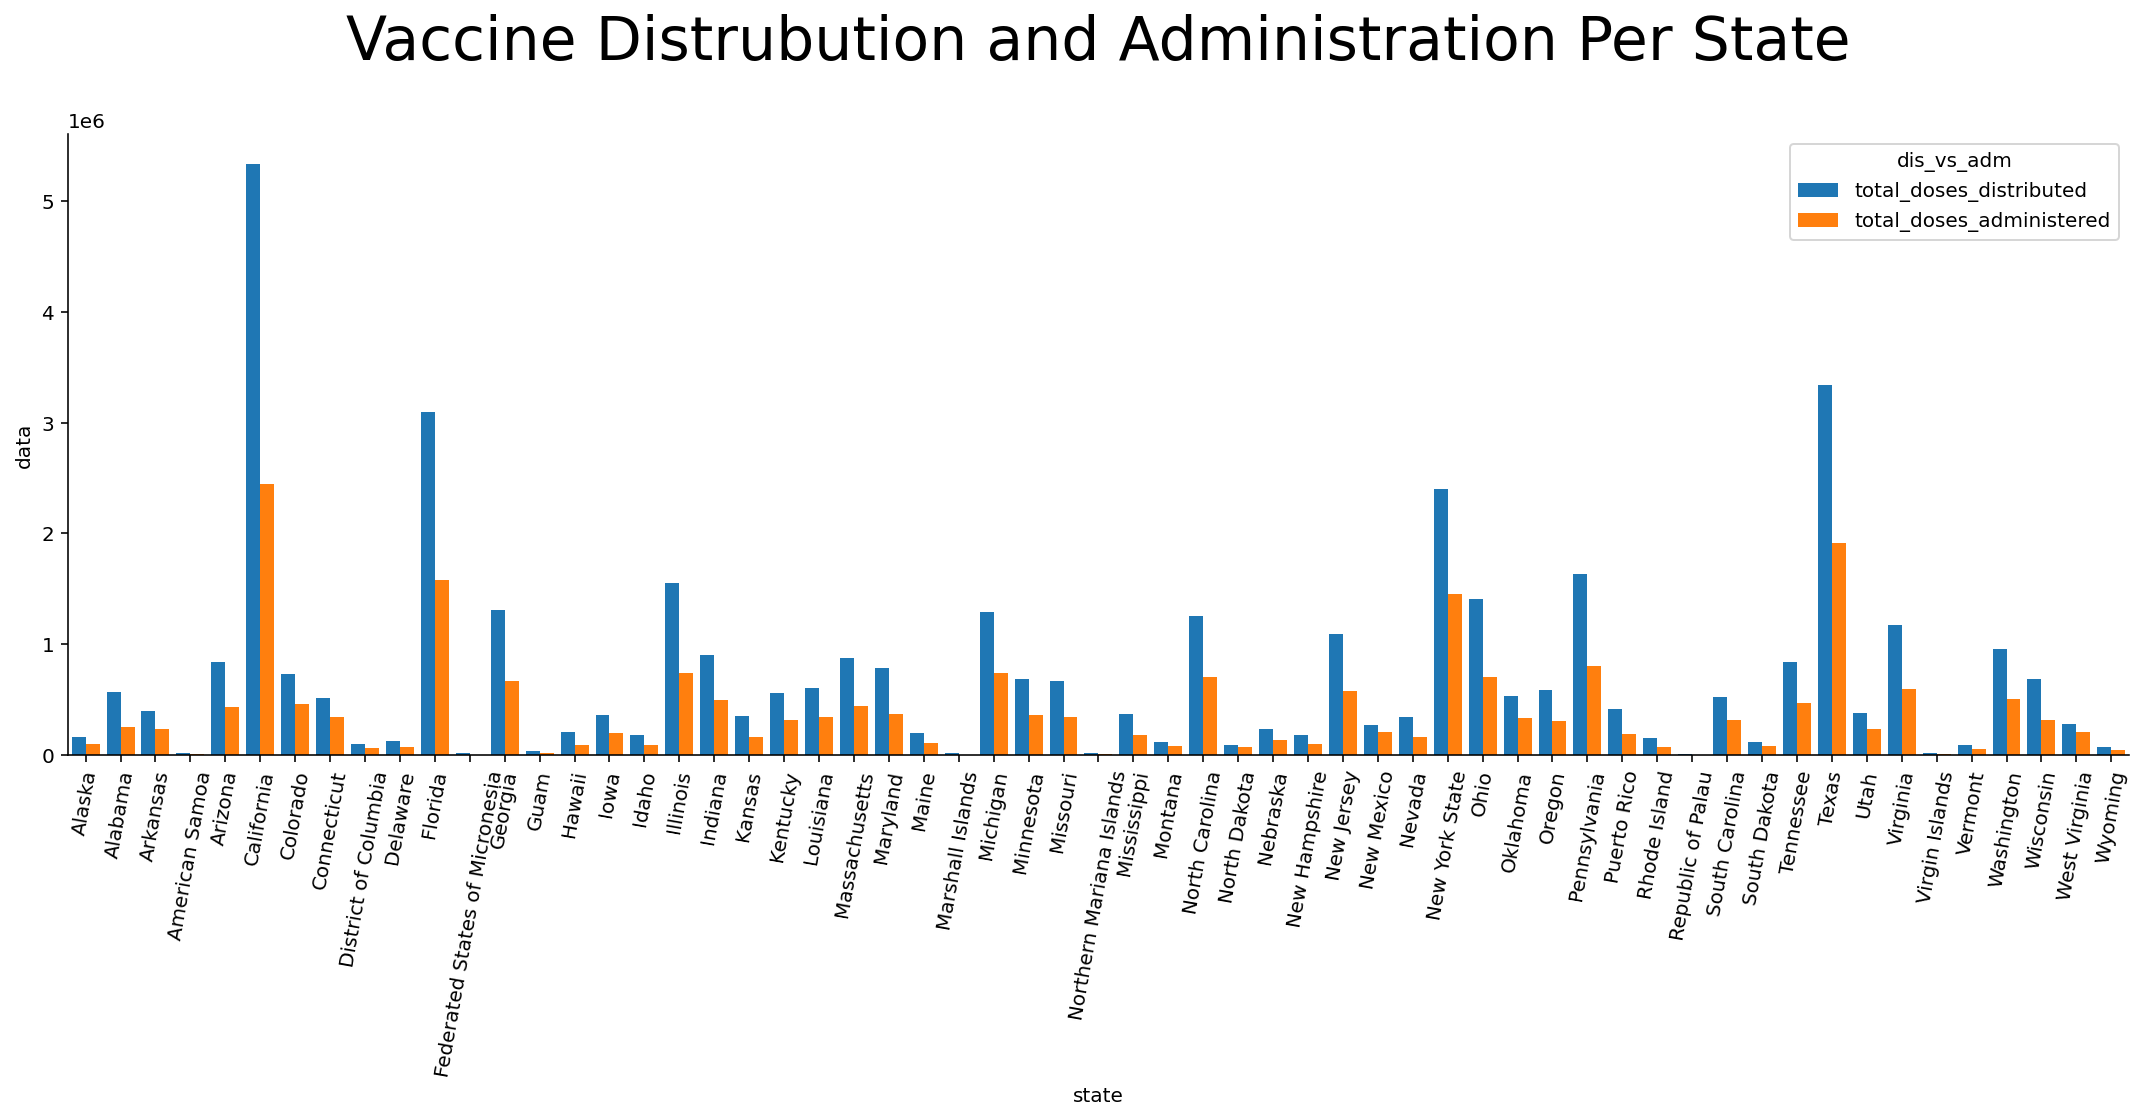

In [8]:
g=sns.catplot(x='state',y='data',hue='dis_vs_adm',legend_out=False,
                data=df,saturation=1,kind='bar',height=5, aspect=3)
plt.xticks(rotation=80)
plt.title('Vaccine Distrubution and Administration Per State',size=30,y=1.1);

#Vaccine Allocation and Administration per state in alphabet order

In [9]:
#make a df that's sorted by the doses number for catplot 

df_sort=df.sort_values(by='data',ascending=False)
df_sort.head()

,state,dis_vs_adm,data
5,California,total_doses_distributed,5340275
50,Texas,total_doses_distributed,3342350
10,Florida,total_doses_distributed,3095350
64,California,total_doses_administered,2446577
39,New York State,total_doses_distributed,2401900


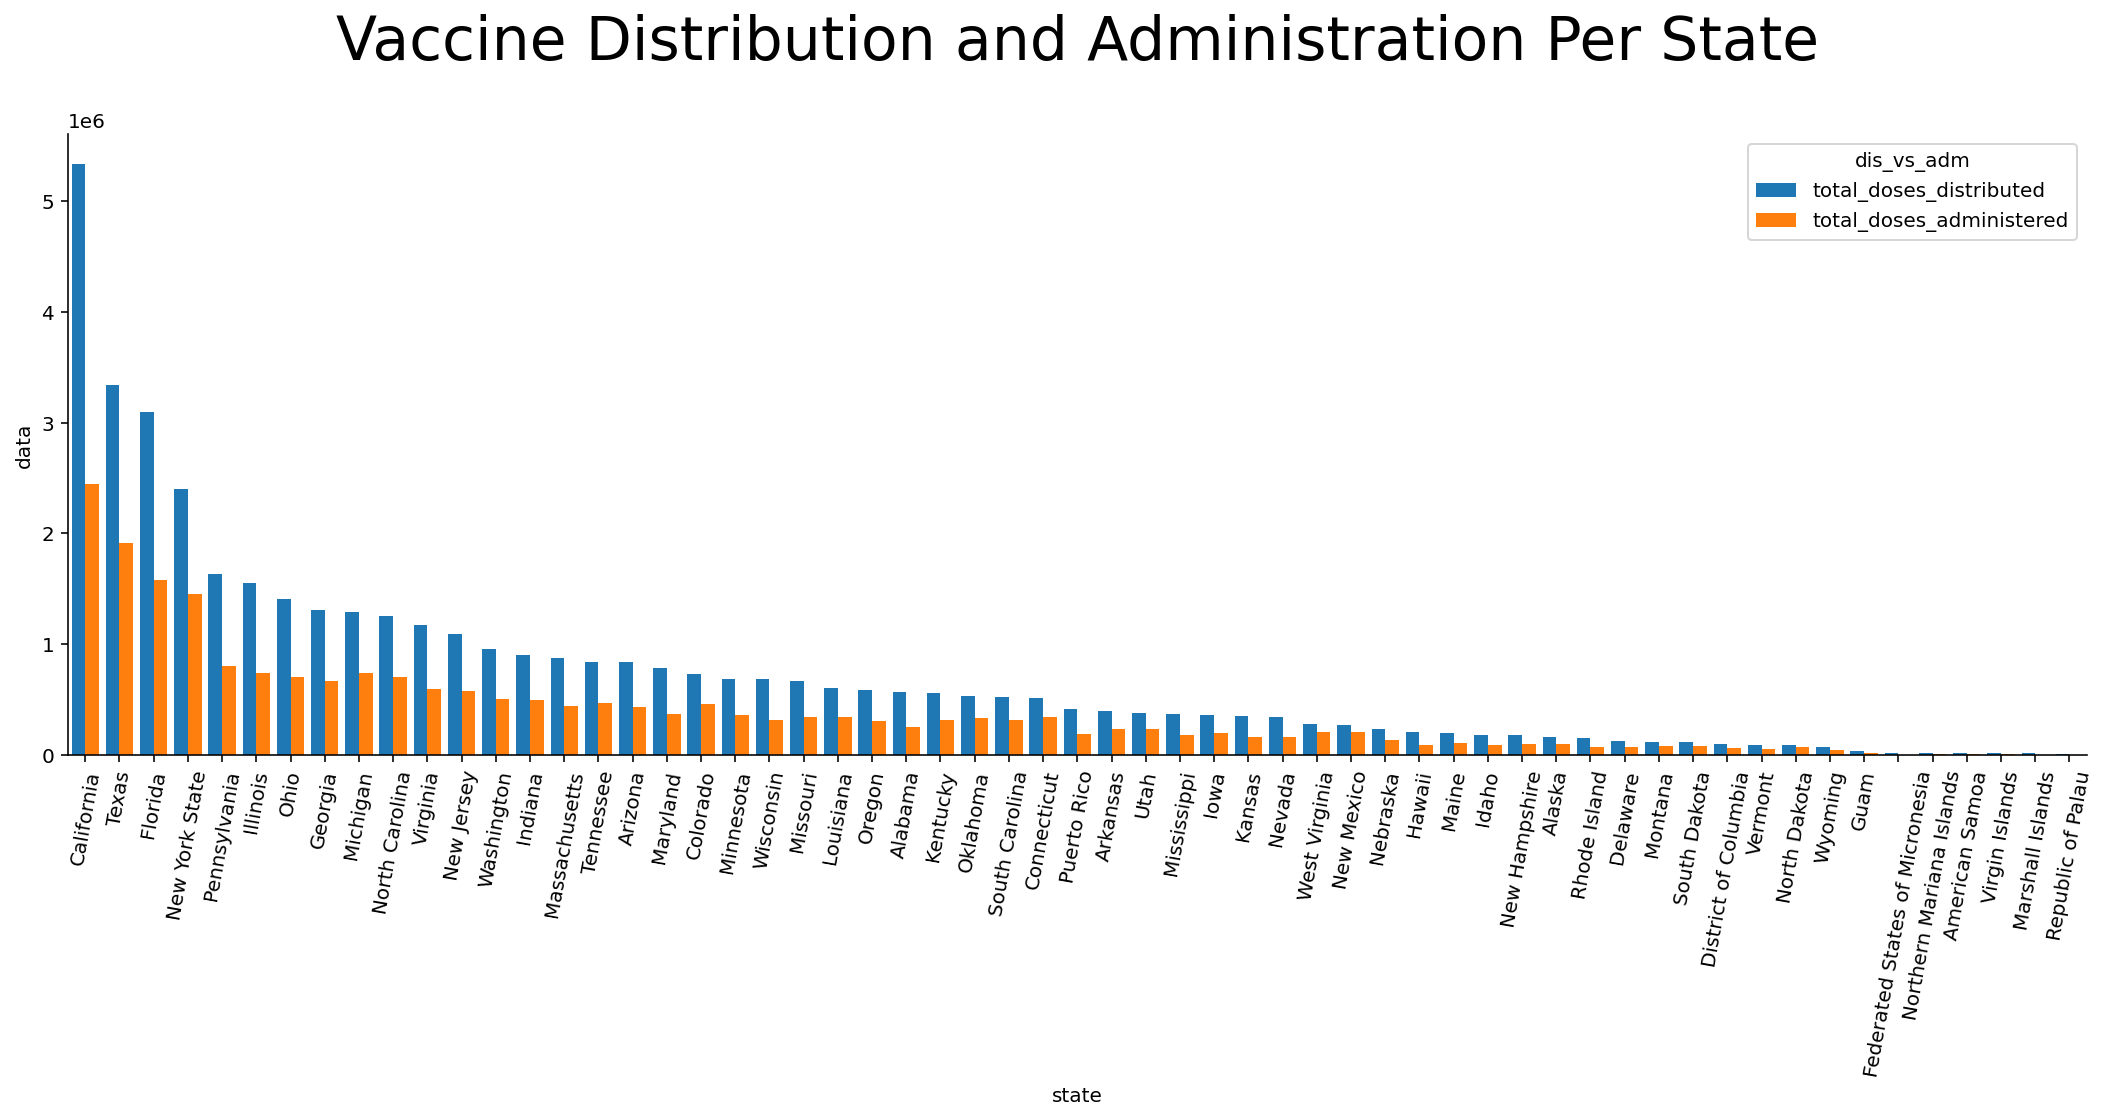

In [10]:
g=sns.catplot(x='state',y='data',hue='dis_vs_adm',legend_out=False,
                data=df_sort,saturation=1,kind='bar',height=5, aspect=3)
plt.xticks(rotation=80)
plt.title('Vaccine Distribution and Administration Per State',size=30,y=1.1);

# vaccine allocation and administration per state in the order of total doses distributed

In [11]:
# sort the original vaccine dataframe by total doses distributed, only keep the top 10

vac_408_sort=vac_408.sort_values(by='total_doses_distributed',ascending=False)[:10]
vac_408_sort.head()

,state,total_doses_distributed,total_doses_administered,doses_distributed_100k,doses_administed_100k,people_1+_dose,doses_1+_100k,people_2_doses,doses_2_100k
6,California,5340275,2446577,13516.0,6192.0,2053652,5198.0,387563,387563
53,Texas,3342350,1917896,11527.0,6614.0,1614648,5569.0,301684,301684
12,Florida,3095350,1575490,14412.0,7335.0,1412466,6576.0,158886,158886
42,New York State,2401900,1453972,12347.0,7474.0,1245215,6401.0,189791,189791
46,Pennsylvania,1636675,800354,12785.0,6252.0,657711,5138.0,141304,141304


In [12]:
df_sort_10=pd.melt(vac_408_sort[['state','total_doses_distributed','total_doses_administered']],\
           id_vars='state',var_name='dis_vs_adm',value_name='data')
df_sort_10.head()

,state,dis_vs_adm,data
0,California,total_doses_distributed,5340275
1,Texas,total_doses_distributed,3342350
2,Florida,total_doses_distributed,3095350
3,New York State,total_doses_distributed,2401900
4,Pennsylvania,total_doses_distributed,1636675


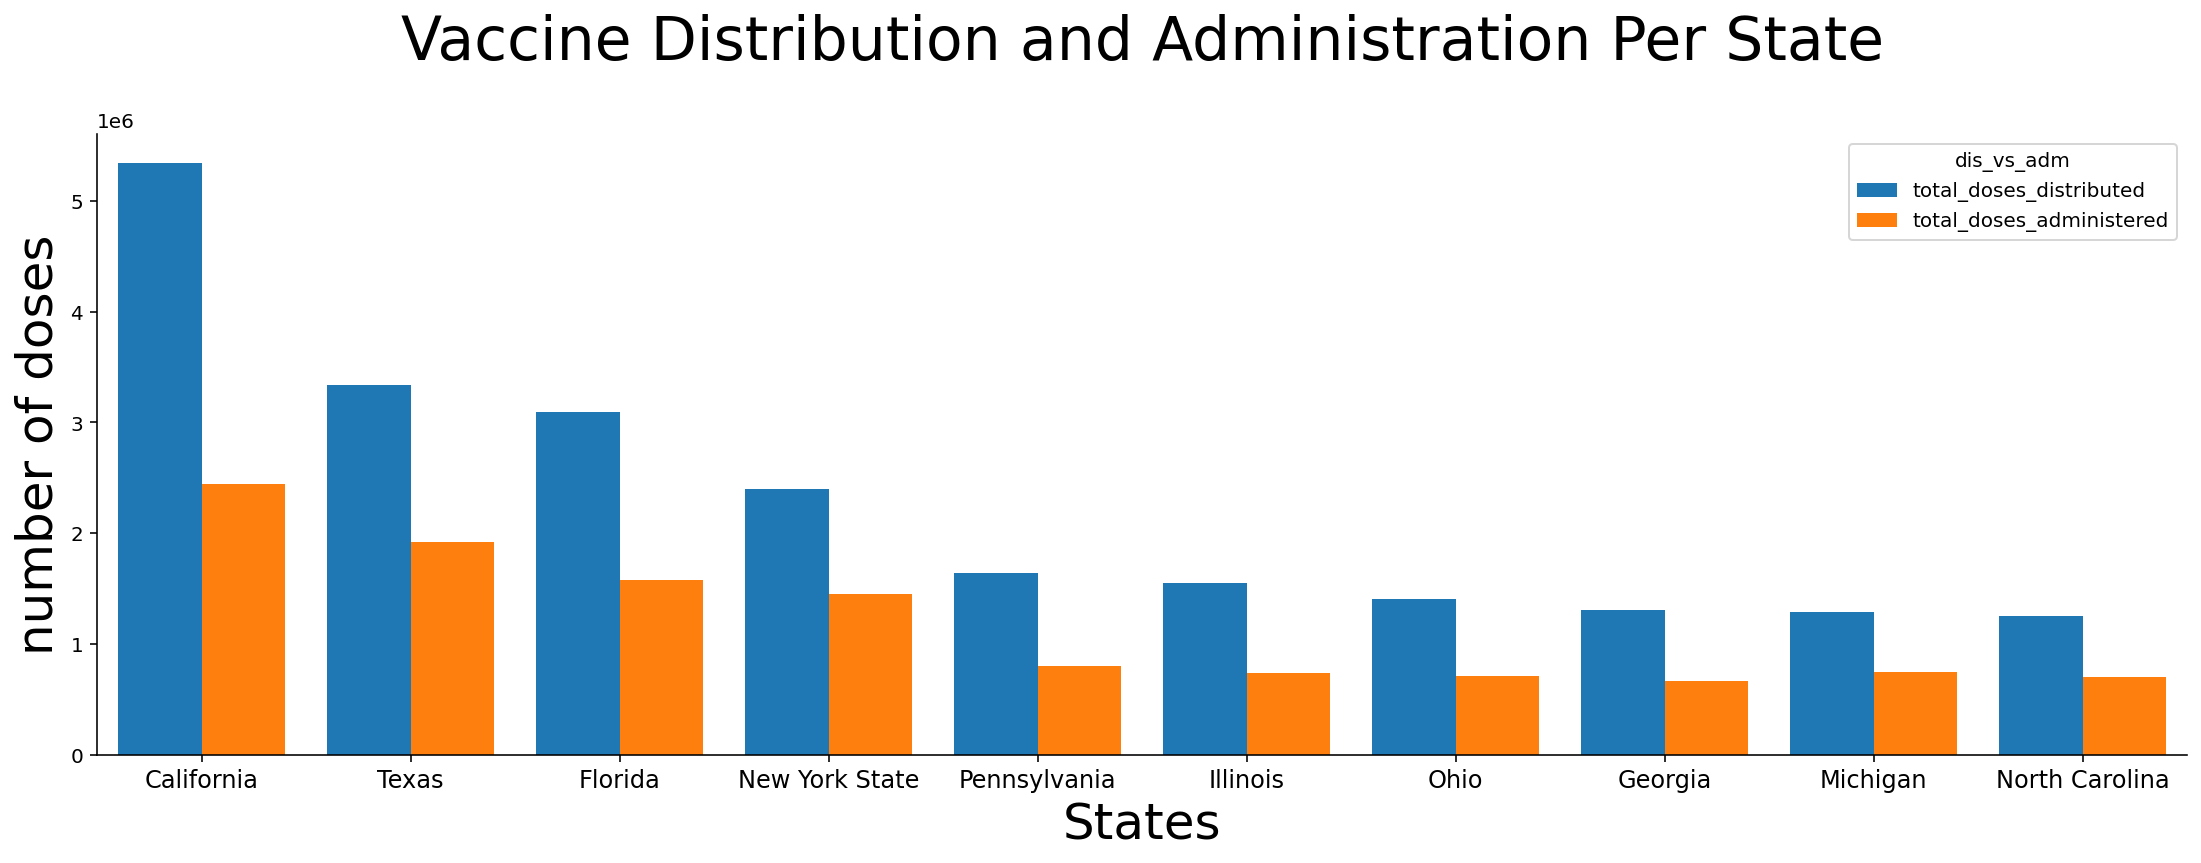

In [13]:
g=sns.catplot(x='state',y='data',hue='dis_vs_adm',legend_out=False,
                data=df_sort_10,saturation=1,kind='bar',height=5, aspect=3)
plt.xticks(size=12)
plt.title('Vaccine Distribution and Administration Per State',size=30,y=1.1)
plt.xlabel('States',size=25)
plt.ylabel('number of doses',size=25);

#the top 10 states with the most total doses distributed, versus the total doses administered 

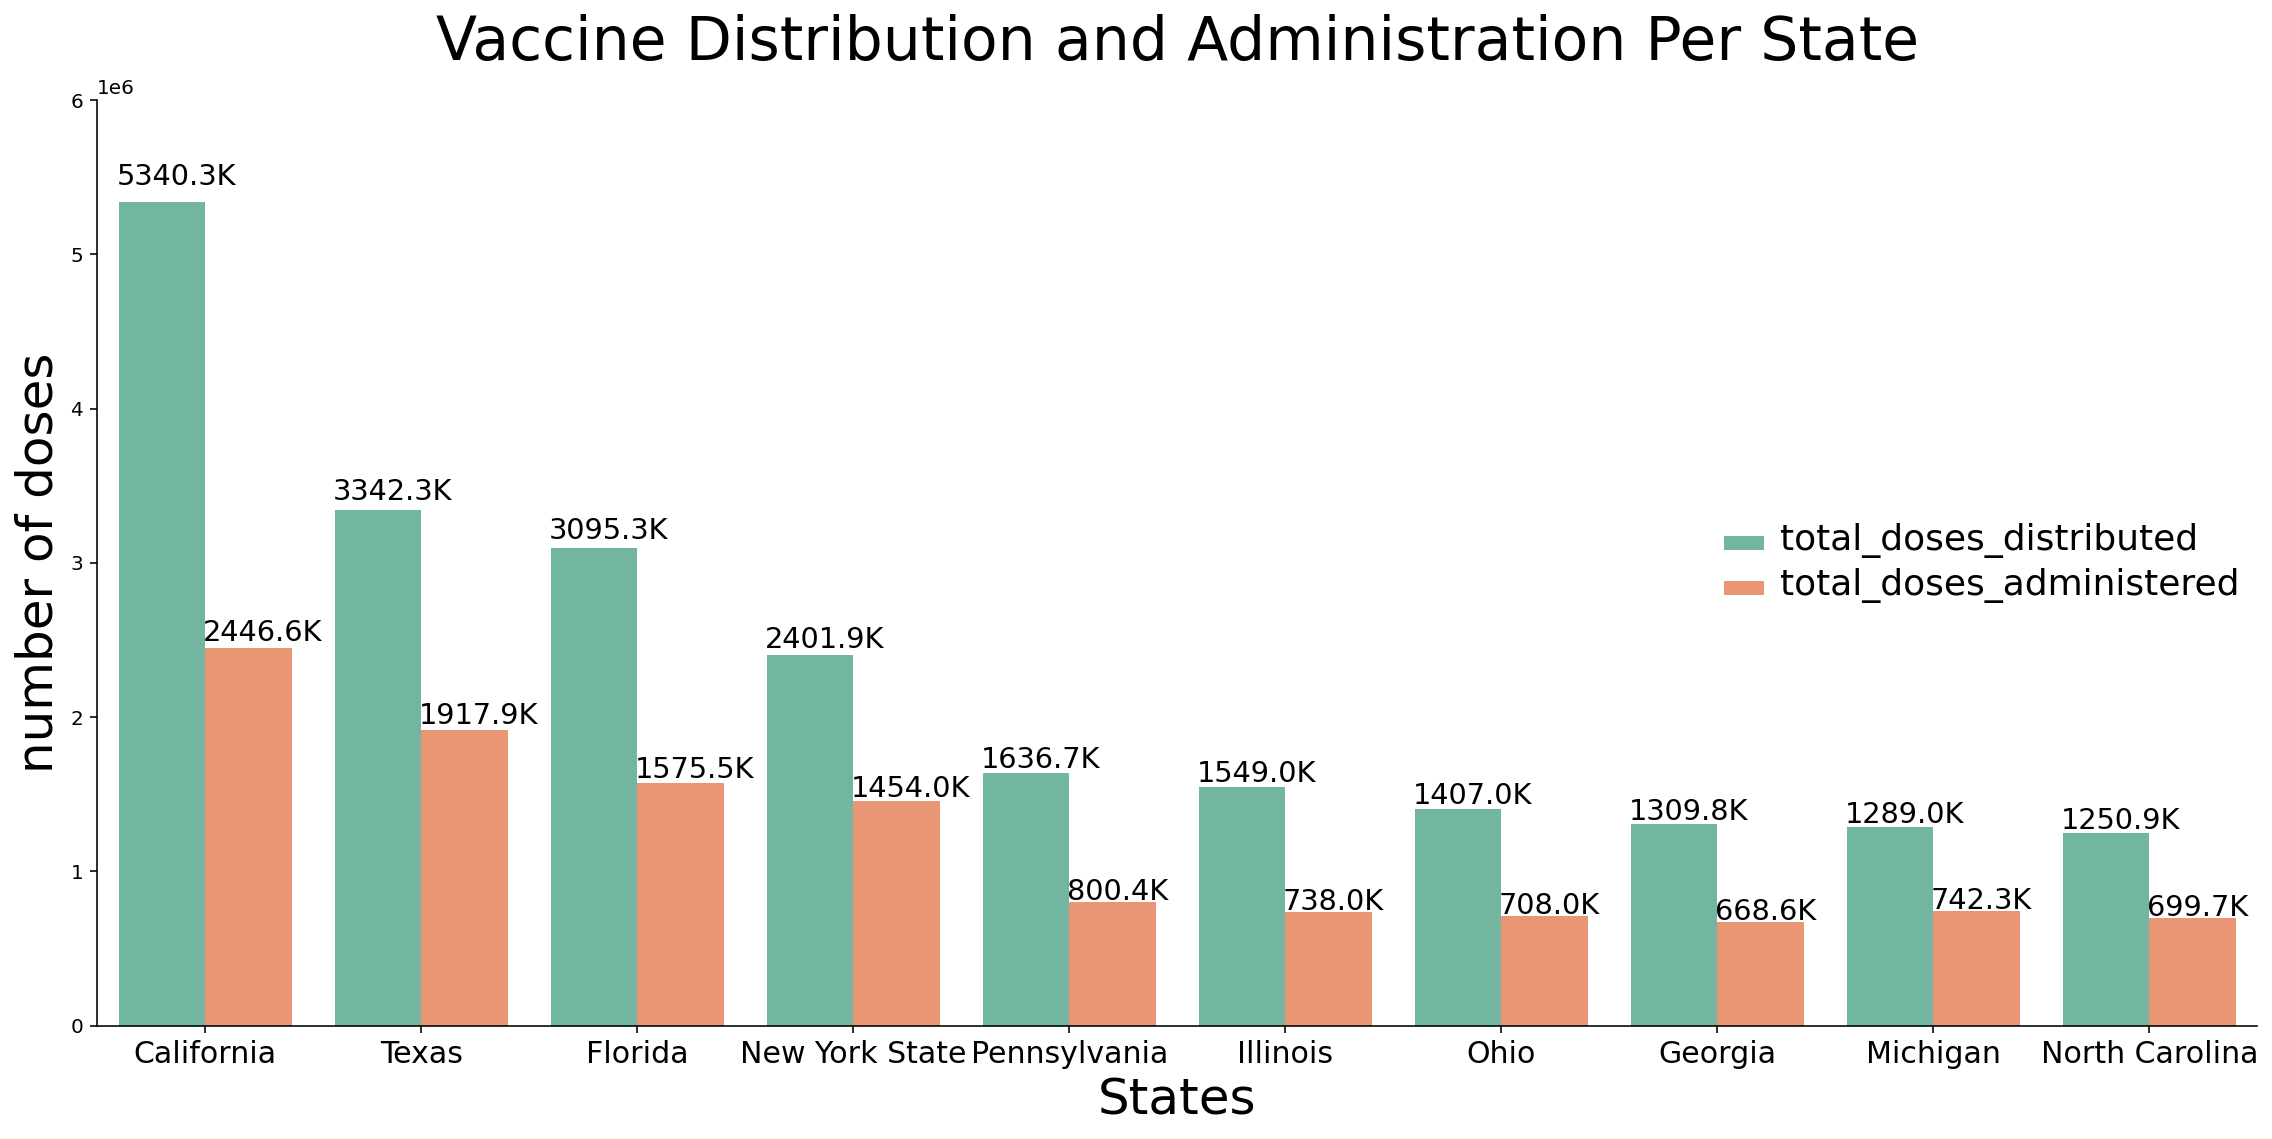

In [35]:
#https://stackoverflow.com/questions/55586912/seaborn-catplot-set-values-over-the-bars

#sns.set_palette("YlOrBr")
g = sns.catplot(x='state', y='data', data=df_sort_10, kind='bar', hue='dis_vs_adm',
                legend_out=False,palette=('Set2'),)

g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 
plt.xticks(size=15)
plt.title('Vaccine Distribution and Administration Per State',size=30,y=1.03)
plt.xlabel('States',size=25)
plt.ylabel('number of doses',size=25)
plt.ylim([0,6000000])
plt.legend(loc='center right',frameon=False)

for ax in g.axes.flat:
    plt.setp(ax.get_legend().get_texts(), fontsize='18') # for legend text
    plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title;


ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='x-large')
    
plt.tight_layout()    
plt.savefig('Vaccine_Distribution_and_Administration_per_State')